# 2조

# 데이터 SET 
### 교통사고분석시스템의 자전거 사고 데이터

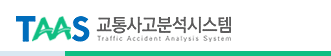

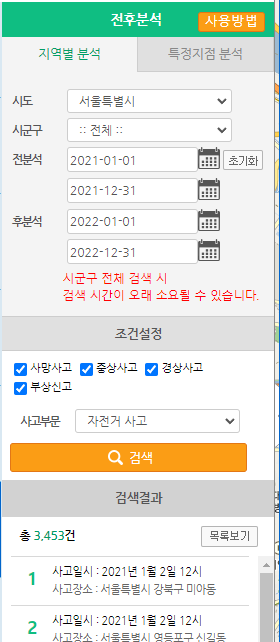 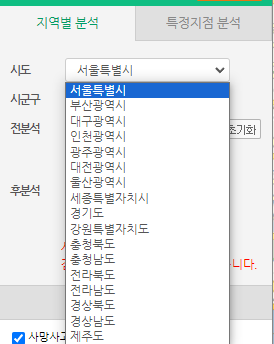

# 데이터 형태

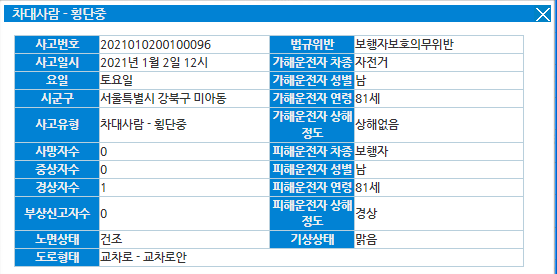

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Replace 'your_folder_path' with the path to your folder containing CSV files
folder_path = 'data/20-22'
# Replace 'output_combined.csv' with the desired name for your combined CSV file
output_file = 'output_combined.csv'
# Get all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

combined_data = pd.DataFrame()

for csv_file in csv_files:
    df = pd.read_csv(csv_file,  encoding='cp949')
    combined_data = pd.concat([combined_data, df], ignore_index=True)

# Save the combined data to a new CSV file
combined_data.to_csv(output_file, index=False)

In [2]:
df = pd.read_csv('output_combined.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32632 entries, 0 to 32631
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        32632 non-null  int64 
 1   사고일시        32632 non-null  object
 2   요일          32632 non-null  object
 3   시군구         32632 non-null  object
 4   사고내용        32632 non-null  object
 5   사망자수        32632 non-null  int64 
 6   중상자수        32632 non-null  int64 
 7   경상자수        32632 non-null  int64 
 8   부상신고자수      32632 non-null  int64 
 9   사고유형        32632 non-null  object
 10  법규위반        32632 non-null  object
 11  노면상태        32632 non-null  object
 12  기상상태        32632 non-null  object
 13  도로형태        32632 non-null  object
 14  가해운전자 차종    32632 non-null  object
 15  가해운전자 성별    32632 non-null  object
 16  가해운전자 연령    32632 non-null  object
 17  가해운전자 상해정도  32632 non-null  object
 18  피해운전자 차종    31198 non-null  object
 19  피해운전자 성별    31198 non-null  object
 20  피해운전자 

In [33]:
df.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2020010200100362,2020년 1월 2일 17시,목요일,경상북도 포항시 북구 죽도동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,자전거,남,70세,경상,승용,여,50세,상해없음
1,2020010800100465,2020년 1월 8일 18시,수요일,경상북도 경주시 안강읍,중상사고,0,1,0,0,차대차 - 측면충돌,...,맑음,단일로 - 기타,자전거,남,20세,중상,승용,여,42세,상해없음
2,2020011000100216,2020년 1월 10일 11시,금요일,경상북도 안동시 운흥동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로부근,자전거,남,75세,경상,승용,남,81세,상해없음
3,2020011100100222,2020년 1월 11일 12시,토요일,경상북도 안동시 북문동,부상신고사고,0,0,0,1,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,자전거,남,76세,부상신고,승용,남,75세,상해없음
4,2020011300100133,2020년 1월 13일 10시,월요일,경상북도 경산시 중방동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,자전거,여,61세,경상,화물,남,29세,상해없음


In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31198 entries, 0 to 32631
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        31198 non-null  int64 
 1   사고일시        31198 non-null  object
 2   요일          31198 non-null  object
 3   시군구         31198 non-null  object
 4   사고내용        31198 non-null  object
 5   사망자수        31198 non-null  int64 
 6   중상자수        31198 non-null  int64 
 7   경상자수        31198 non-null  int64 
 8   부상신고자수      31198 non-null  int64 
 9   사고유형        31198 non-null  object
 10  법규위반        31198 non-null  object
 11  노면상태        31198 non-null  object
 12  기상상태        31198 non-null  object
 13  도로형태        31198 non-null  object
 14  가해운전자 차종    31198 non-null  object
 15  가해운전자 성별    31198 non-null  object
 16  가해운전자 연령    31198 non-null  object
 17  가해운전자 상해정도  31198 non-null  object
 18  피해운전자 차종    31198 non-null  object
 19  피해운전자 성별    31198 non-null  object
 20  피해운전자 

In [5]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"칼럼 '{column}'의 유니크한 값: {unique_values}")
    print()

칼럼 '사고번호'의 유니크한 값: [2020010200100362 2020010800100465 2020011000100216 ... 2019121400100366
 2019122100100277 2019123000100415]

칼럼 '사고일시'의 유니크한 값: ['2020년 1월 2일 17시' '2020년 1월 8일 18시' '2020년 1월 10일 11시' ...
 '2019년 12월 7일 13시' '2019년 12월 10일 06시' '2019년 12월 14일 12시']

칼럼 '요일'의 유니크한 값: ['목요일' '수요일' '금요일' '토요일' '월요일' '화요일' '일요일']

칼럼 '시군구'의 유니크한 값: ['경상북도 포항시 북구 죽도동' '경상북도 경주시 안강읍' '경상북도 안동시 운흥동' ... '대전광역시 유성구 계산동'
 '대전광역시 유성구 용계동' '대전광역시 동구 신하동']

칼럼 '사고내용'의 유니크한 값: ['경상사고' '중상사고' '부상신고사고' '사망사고']

칼럼 '사망자수'의 유니크한 값: [0 1]

칼럼 '중상자수'의 유니크한 값: [0 1 2 3]

칼럼 '경상자수'의 유니크한 값: [ 1  0  2  4  3  5  7  6 10]

칼럼 '부상신고자수'의 유니크한 값: [0 1 2 3 4 6 5]

칼럼 '사고유형'의 유니크한 값: ['차대차 - 측면충돌' '차대차 - 정면충돌' '차대차 - 기타' '차대사람 - 차도통행중' '차대차 - 추돌'
 '차대사람 - 길가장자리구역통행중' '차대사람 - 기타' '차대사람 - 보도통행중' '차대사람 - 횡단중' '차량단독 - 전도전복'
 '차량단독 - 전도전복 - 전도' '차대차 - 후진중충돌' '차량단독 - 전도전복 - 전복' '철길건널목 - 철길건널목']

칼럼 '법규위반'의 유니크한 값: ['교차로운행방법위반' '안전운전불이행' '중앙선침범' '신호위반' '차로위반' '직진우회전진행방해' '안전거리미확보' '기타'
 '보행자보호의무위반' '불법유턴']

칼럼 '노면상태'의

In [6]:
value_to_drop = ['미분류', '기타불명']
column_to_check = ['가해운전자 연령','피해운전자 연령','피해운전자 차종','피해운전자 성별', '가해운전자 성별']

# Create a boolean mask for rows with the specified value in the specified column
mask = df[column_to_check].isin(value_to_drop).any(axis=1)

# Drop rows based on the mask
df = df[~mask]

# If you want to reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [7]:
df['가해운전자 연령'] = df['가해운전자 연령'].str.extract('(\d+)').astype(int)
df['피해운전자 연령'] = df['피해운전자 연령'].str.extract('(\d+)').astype(int)

In [8]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"칼럼 '{column}'의 유니크한 값: {unique_values}")
    print()

칼럼 '사고번호'의 유니크한 값: [2020010200100362 2020010800100465 2020011000100216 ... 2019121400100366
 2019122100100277 2019123000100415]

칼럼 '사고일시'의 유니크한 값: ['2020년 1월 2일 17시' '2020년 1월 8일 18시' '2020년 1월 10일 11시' ...
 '2019년 12월 7일 13시' '2019년 12월 10일 06시' '2019년 12월 14일 12시']

칼럼 '요일'의 유니크한 값: ['목요일' '수요일' '금요일' '토요일' '월요일' '화요일' '일요일']

칼럼 '시군구'의 유니크한 값: ['경상북도 포항시 북구 죽도동' '경상북도 경주시 안강읍' '경상북도 안동시 운흥동' ... '대전광역시 유성구 계산동'
 '대전광역시 유성구 용계동' '대전광역시 동구 신하동']

칼럼 '사고내용'의 유니크한 값: ['경상사고' '중상사고' '부상신고사고' '사망사고']

칼럼 '사망자수'의 유니크한 값: [0 1]

칼럼 '중상자수'의 유니크한 값: [0 1 2 3]

칼럼 '경상자수'의 유니크한 값: [ 1  0  2  4  3  5  7  6 10]

칼럼 '부상신고자수'의 유니크한 값: [0 1 2 3 4 6 5]

칼럼 '사고유형'의 유니크한 값: ['차대차 - 측면충돌' '차대차 - 정면충돌' '차대차 - 기타' '차대사람 - 차도통행중' '차대차 - 추돌'
 '차대사람 - 길가장자리구역통행중' '차대사람 - 기타' '차대사람 - 보도통행중' '차대사람 - 횡단중' '차대차 - 후진중충돌']

칼럼 '법규위반'의 유니크한 값: ['교차로운행방법위반' '안전운전불이행' '중앙선침범' '신호위반' '차로위반' '직진우회전진행방해' '안전거리미확보' '기타'
 '보행자보호의무위반' '불법유턴']

칼럼 '노면상태'의 유니크한 값: ['건조' '젖음/습기' '기타' '적설' '서리/결빙' '침수']

칼럼 '기상상태'의 유니크한 값: ['

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30373 entries, 0 to 30372
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        30373 non-null  int64 
 1   사고일시        30373 non-null  object
 2   요일          30373 non-null  object
 3   시군구         30373 non-null  object
 4   사고내용        30373 non-null  object
 5   사망자수        30373 non-null  int64 
 6   중상자수        30373 non-null  int64 
 7   경상자수        30373 non-null  int64 
 8   부상신고자수      30373 non-null  int64 
 9   사고유형        30373 non-null  object
 10  법규위반        30373 non-null  object
 11  노면상태        30373 non-null  object
 12  기상상태        30373 non-null  object
 13  도로형태        30373 non-null  object
 14  가해운전자 차종    30373 non-null  object
 15  가해운전자 성별    30373 non-null  object
 16  가해운전자 연령    30373 non-null  int64 
 17  가해운전자 상해정도  30373 non-null  object
 18  피해운전자 차종    30373 non-null  object
 19  피해운전자 성별    30373 non-null  object
 20  피해운전자 

In [49]:
df.to_csv('jung.csv', index=False)

In [41]:
# df['사망자수'].value_counts(normalize=True)

# 여기부터 시작입니다 시각화 시작하시면 됩니다.


# 교통사고 인적피해의 구분 
[출처](https://taas.koroad.or.kr/sta/acs/exs/wordArngPopup.do)

- "사망" 이란 교통사고 발생시로부터 30일이내에 사망한 경우. (99년까지는 72시간 이내)
- "중상" 이란 교통사고로 인하여 3주 이상의 치료를 요하는 부상을 입은 경우.
- "경상" 이란 교통사고로 인하여 5일 이상 3주 미만의 치료를 요하는 부상을 입은 경우.
- "부상신고" 란 교통사고로 인하여 5일 미만의 치료를 요하는 부상을 입은 경우.

In [50]:
df['가해운전자 상해정도'].value_counts()

경상      10386
상해없음     8181
부상신고     5712
중상       5115
기타불명      639
사망        340
Name: 가해운전자 상해정도, dtype: int64

In [51]:
df['damage_level'] = df['가해운전자 상해정도'].map({'경상': 1, '부상신고': 1, '기타불명': 0, '상해없음': 0, '사망': 2, '중상': 2})

In [52]:
df['damage_level'].value_counts()

1    16098
0     8820
2     5455
Name: damage_level, dtype: int64

# 널값

1. 가해운전자 성별
2. 가해운전 상해정도
3. 피해운전자 차종
4. 피해운전자 성별
5. 피해운전자 연령
6. 피해운전자 상해정도

In [37]:
df['피해운전자 상해정도'].value_counts()

상해없음    19080
경상       6281
중상       3718
부상신고     1142
기타불명      802
미분류       144
사망         31
Name: 피해운전자 상해정도, dtype: int64

In [35]:
df.isnull().sum()

사고번호             0
사고일시             0
요일               0
시군구              0
사고내용             0
사망자수             0
중상자수             0
경상자수             0
부상신고자수           0
사고유형             0
법규위반             0
노면상태             0
기상상태             0
도로형태             0
가해운전자 차종         0
가해운전자 성별         0
가해운전자 연령         0
가해운전자 상해정도       0
피해운전자 차종      1434
피해운전자 성별      1434
피해운전자 연령      1434
피해운전자 상해정도    1434
dtype: int64

In [34]:
df[df.isnull().any(axis=1)]

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
16,2020020200100258,2020년 2월 2일 16시,일요일,경상북도 예천군 풍양면,중상사고,0,1,0,0,차량단독 - 전도전복 - 전도,...,맑음,단일로 - 기타,자전거,남,72세,중상,NaN,NaN,NaN,NaN
43,2020031300100304,2020년 3월 13일 16시,금요일,경상북도 영양군 일월면,부상신고사고,0,0,0,1,차량단독 - 도로외이탈 - 추락,...,맑음,기타 - 기타,자전거,남,81세,부상신고,NaN,NaN,NaN,NaN
56,2020040200100305,2020년 4월 2일 14시,목요일,경상북도 포항시 남구 대송면,중상사고,0,1,0,0,차량단독 - 기타,...,맑음,단일로 - 기타,자전거,남,67세,중상,NaN,NaN,NaN,NaN
62,2020041500100443,2020년 4월 15일 21시,수요일,경상북도 구미시 공단동,경상사고,0,0,1,0,차량단독 - 기타,...,맑음,단일로 - 기타,자전거,남,53세,경상,NaN,NaN,NaN,NaN
70,2020042100100372,2020년 4월 21일 17시,화요일,경상북도 포항시 남구 일월동,경상사고,0,0,1,0,차량단독 - 기타,...,맑음,교차로 - 교차로부근,자전거,남,38세,경상,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32574,2019090600100616,2019년 9월 6일 20시,금요일,대전광역시 유성구 구암동,경상사고,0,0,1,0,차량단독 - 주/정차차량 충돌,...,맑음,단일로 - 기타,자전거,남,68세,경상,NaN,NaN,NaN,NaN
32583,2019092700100586,2019년 9월 27일 18시,금요일,대전광역시 중구 산성동,부상신고사고,0,0,0,1,차량단독 - 기타,...,맑음,단일로 - 지하차도(도로)내,자전거,여,57세,부상신고,NaN,NaN,NaN,NaN
32601,2019102100100248,2019년 10월 21일 10시,월요일,대전광역시 서구 가수원동,중상사고,0,1,0,0,차량단독 - 기타,...,맑음,단일로 - 기타,자전거,여,41세,중상,NaN,NaN,NaN,NaN
32602,2019102200100350,2019년 10월 22일 13시,화요일,대전광역시 서구 탄방동,중상사고,0,1,0,0,차량단독 - 전도전복 - 전도,...,맑음,교차로 - 교차로안,자전거,남,30세,중상,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 31198 entries, 0 to 32631
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        31198 non-null  int64 
 1   사고일시        31198 non-null  object
 2   요일          31198 non-null  object
 3   시군구         31198 non-null  object
 4   사고내용        31198 non-null  object
 5   사망자수        31198 non-null  int64 
 6   중상자수        31198 non-null  int64 
 7   경상자수        31198 non-null  int64 
 8   부상신고자수      31198 non-null  int64 
 9   사고유형        31198 non-null  object
 10  법규위반        31198 non-null  object
 11  노면상태        31198 non-null  object
 12  기상상태        31198 non-null  object
 13  도로형태        31198 non-null  object
 14  가해운전자 차종    31198 non-null  object
 15  가해운전자 성별    31198 non-null  object
 16  가해운전자 연령    31198 non-null  object
 17  가해운전자 상해정도  31198 non-null  object
 18  피해운전자 차종    31198 non-null  object
 19  피해운전자 성별    31198 non-null  object
 20  피해운전자 

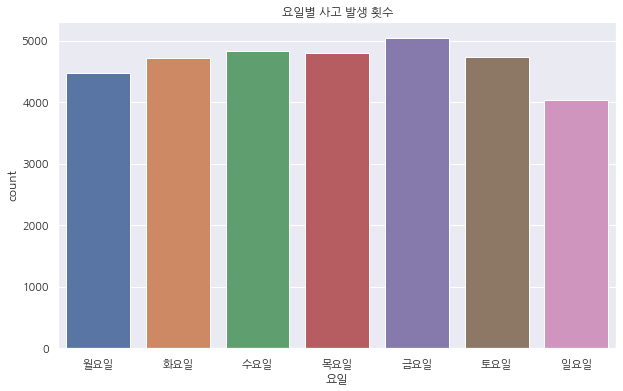

In [25]:
day_order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
plt.figure(figsize=(10,6))
sns.countplot(x='요일',order=day_order, data=df )
plt.title('요일별 사고 발생 횟수')
plt.show()